<a href="https://colab.research.google.com/github/gaditi123/quant/blob/main/Ordinary_Least_Squares_Regression_(OLS).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas_datareader as web
import datetime 

In [8]:
def get(tickers, startdate, enddate):
  def data(ticker):
    return (web.get_data_yahoo(ticker, start=startdate, end=enddate))
  datas = map (data, tickers)
  return(pd.concat(datas, keys=tickers, names=['Ticker', 'Date']))

tickers = ['AAPL', 'MSFT', 'IBM', 'GOOG']
all_data = get(tickers, datetime.datetime(2014, 10, 1), datetime.datetime(2020, 1, 1))

Ordinary Least-Squares Regression (OLS)

In [10]:
import statsmodels.api as sm

# Import the `datetools` module from `pandas`
#from pandas.core import datetools

# Isolate the adjusted closing price
all_adj_close = all_data[['Adj Close']]

# Calculate the returns 
all_returns = np.log(all_adj_close / all_adj_close.shift(1))

# Isolate the AAPL returns 
aapl_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'AAPL']
aapl_returns.index = aapl_returns.index.droplevel('Ticker')

# Isolate the MSFT returns
msft_returns = all_returns.iloc[all_returns.index.get_level_values('Ticker') == 'MSFT']
msft_returns.index = msft_returns.index.droplevel('Ticker')

# Build up a new DataFrame with AAPL and MSFT returns
return_data = pd.concat([aapl_returns, msft_returns], axis=1)[1:]
return_data.columns = ['AAPL', 'MSFT']

# Add a constant 
X = sm.add_constant(return_data['AAPL'])

# Construct the model
model = sm.OLS(return_data['MSFT'],X).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MSFT   R-squared:                       0.327
Model:                            OLS   Adj. R-squared:                  0.326
Method:                 Least Squares   F-statistic:                     639.6
Date:                Sat, 22 May 2021   Prob (F-statistic):          2.24e-115
Time:                        17:40:02   Log-Likelihood:                 3970.8
No. Observations:                1321   AIC:                            -7938.
Df Residuals:                    1319   BIC:                            -7927.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0005      0.000      1.646      0.1

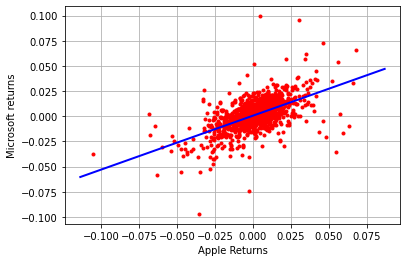

In [11]:
# Plot returns of AAPL and MSFT
plt.plot(return_data['AAPL'], return_data['MSFT'], 'r.')

# Add an axis to the plot
ax = plt.axis()

# Initialize `x`
x = np.linspace(ax[0], ax[1] + 0.01)

# Plot the regression line
plt.plot(x, model.params[0] + model.params[1] * x, 'b', lw=2)

# Customize the plot
plt.grid(True)
plt.axis('tight')
plt.xlabel('Apple Returns')
plt.ylabel('Microsoft returns')

# Show the plot
plt.show()

Rolling correlation window

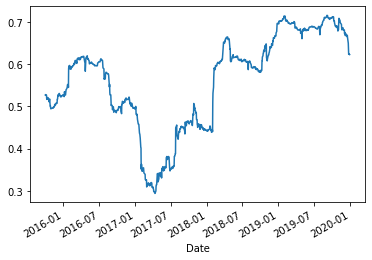

In [12]:
return_data['MSFT'].rolling(window=252).corr(return_data['AAPL']).plot()

# Show the plot
plt.show()